In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib.lines import Line2D
import matplotlib.ticker as plticker

In [2]:
wd = "../../"
bench_results = f"{wd}/benchmarks/data/output/cool2hic/report.tsv"

cpus = [2, 4, 8, 16]

tool_pretty_names = {f"hictk_mt{n}_cooler": f"hictk ({n} CPUs)" for n in cpus}

resolutions_pretty = {
    10: "10",
    100: "100",
    500: "500",
    1000: "1k",
    5000: "5k",
    10000: "10k",
    25000: "25k",
    50000: "50k",
    100000: "100k",
    250000: "250k",
    500000: "500k",
    1000000: "1M",
    2500000: "2.5M",
    5000000: "5M",
}

color_palette = [matplotlib.colormaps["hot"](n) for n in (0.75, 0.5, 0.25, 0.0)]

matplotlib.rcParams.update(
    {"axes.titlesize": 10, "axes.labelsize": 22, "legend.fontsize": 18, "xtick.labelsize": 18, "ytick.labelsize": 18}
)

In [3]:
def import_data(path) -> pd.DataFrame:
    df = pd.read_table(path)
    df["time_min"] = df["time"] / 60  # sec -> min
    df["memory_gb"] = df["memory"] / 1.0e6  # kb -> gb
    df["tool"] = (df["tool"] + "_" + df["format"]).map(tool_pretty_names)
    df["resolution_pretty"] = df["resolution"].map(resolutions_pretty)

    return df.sort_values(["resolution", "cpus"])

In [4]:
df = import_data(bench_results)
df

,tool,format,resolution,cpus,time,memory,time_min,memory_gb,resolution_pretty
39,hictk (2 CPUs),cooler,10,2,20484.13,9618484,341.402167,9.618484,10
91,hictk (2 CPUs),cooler,10,2,20472.69,9617380,341.211500,9.617380,10
143,hictk (2 CPUs),cooler,10,2,20748.39,9617592,345.806500,9.617592,10
13,hictk (4 CPUs),cooler,10,4,15834.77,10040692,263.912833,10.040692,10
65,hictk (4 CPUs),cooler,10,4,15997.26,9779176,266.621000,9.779176,10
...,...,...,...,...,...,...,...,...,...
86,hictk (8 CPUs),cooler,2500000,8,2.12,103044,0.035333,0.103044,2.5M
138,hictk (8 CPUs),cooler,2500000,8,2.09,102532,0.034833,0.102532,2.5M
8,hictk (16 CPUs),cooler,2500000,16,2.09,102832,0.034833,0.102832,2.5M
60,hictk (16 CPUs),cooler,2500000,16,2.05,105924,0.034167,0.105924,2.5M


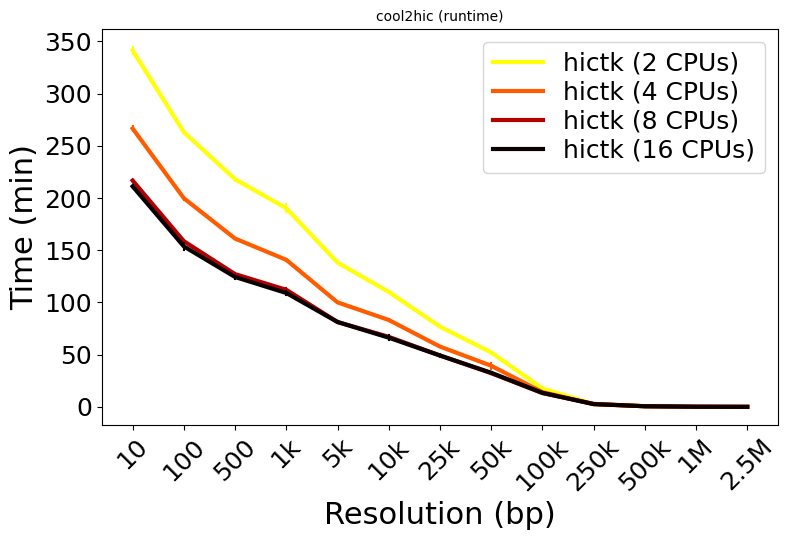

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5.5))

sns.lineplot(
    df,
    x="resolution_pretty",
    y="time_min",
    hue="tool",
    palette=color_palette,
    estimator="median",
    err_style="bars",
    errorbar=("se", 2),
    ax=ax,
    linewidth=3,
    seed=123456,
    legend=False,
)

palette = sns.color_palette()

ax.set(title="cool2hic (runtime)", ylabel="Time (min)", xlabel="Resolution (bp)")

ax.tick_params(axis="x", rotation=45)

ax.legend(
    handles=[Line2D([0], [0], color=color_palette[i], lw=3, label=f"hictk ({n} CPUs)") for i, n in enumerate(cpus)],
    labelspacing=0.2,
)

loc = plticker.MultipleLocator(base=50)
ax.yaxis.set_major_locator(loc)

fig.tight_layout()
fig.savefig("/tmp/hic2cool_runtime.png", dpi=600)
fig.savefig("/tmp/hic2cool_runtime.svg")

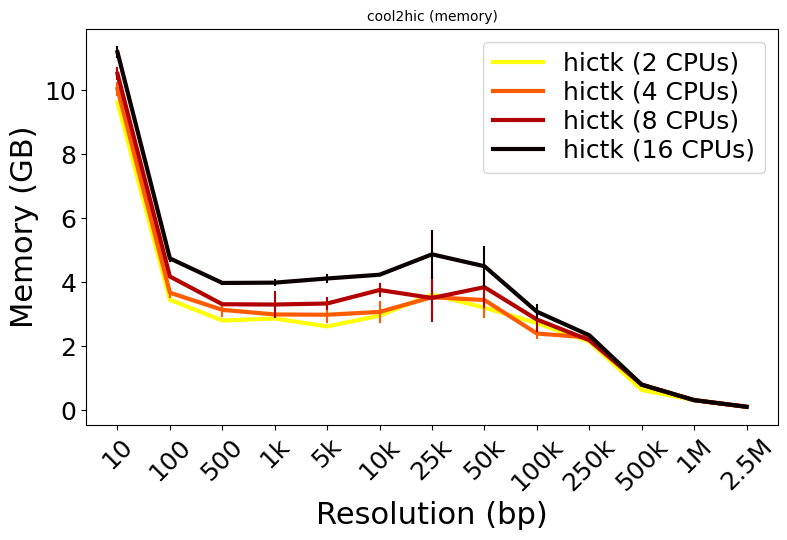

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5.5))

sns.lineplot(
    df,
    x="resolution_pretty",
    y="memory_gb",
    hue="tool",
    palette=color_palette,
    estimator="median",
    err_style="bars",
    errorbar=("se", 2),
    ax=ax,
    linewidth=3,
    seed=123456,
    legend=False,
)

ax.set(title="cool2hic (memory)", ylabel="Memory (GB)", xlabel="Resolution (bp)")

ax.tick_params(axis="x", rotation=45)

ax.legend(
    handles=[Line2D([0], [0], color=color_palette[i], lw=3, label=f"hictk ({n} CPUs)") for i, n in enumerate(cpus)],
    labelspacing=0.2,
)

loc = plticker.MultipleLocator(base=2)
ax.yaxis.set_major_locator(loc)

fig.tight_layout()
fig.savefig("/tmp/hic2cool_memory.png", dpi=600)
fig.savefig("/tmp/hic2cool_memory.svg")